<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Clustering/KMeans/Income_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# See the scatterness , correlation to identify to do feature selection, which features to pick and feed to K Means algorithm

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/income.csv')
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [24]:
from sklearn.cluster import KMeans

In [25]:
km= KMeans(n_clusters=3)
y_pred  = km.fit_predict(df[["Age","Income($)"]])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

We can see the data is clustered into 3 clusters

In [26]:
df["cluster"]=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

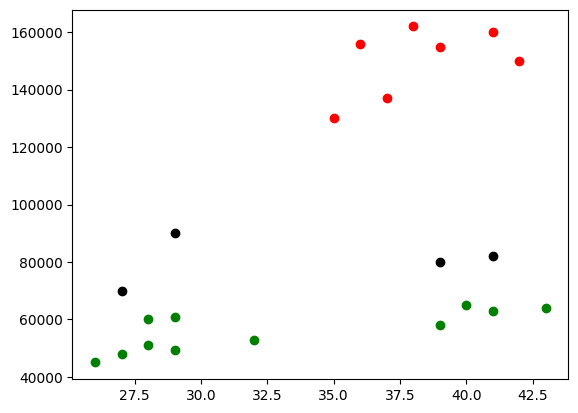

In [27]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt

we can see the clustering is not proper, one reason for that could be , income and Age have different value ranges

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])

In [29]:
df.head(5)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


## Re run the algorithm after scaling the faetures

In [30]:
km= KMeans(n_clusters=3)
y_pred  = km.fit_predict(df[["Age","Income($)"]])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [31]:
df["cluster"]=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

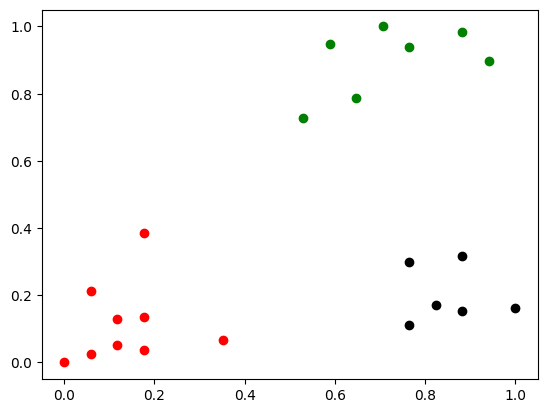

In [32]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt

In [33]:
print(type(km.cluster_centers_))

<class 'numpy.ndarray'>


Draw plots with the centroids

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

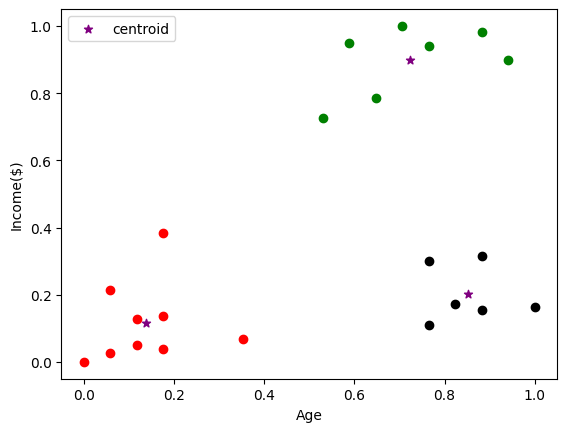

In [34]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income($)")
plt

## Now the clustering looks okay, after scaling of the features

How do we know that the number of clusters are optimal ?? </br>
Lets look at the WCSS for different cluster numbers

In [35]:
wcss=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[["Age","Income($)"]])
  wcss.append(km.inertia_)

print(wcss)

[5.434011511988179, 2.091136388699078, 0.4750783498553097, 0.3625079900797329, 0.2860717106689441, 0.22407006551788158, 0.17840674931327935, 0.1670062985940016, 0.12394402484752351]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

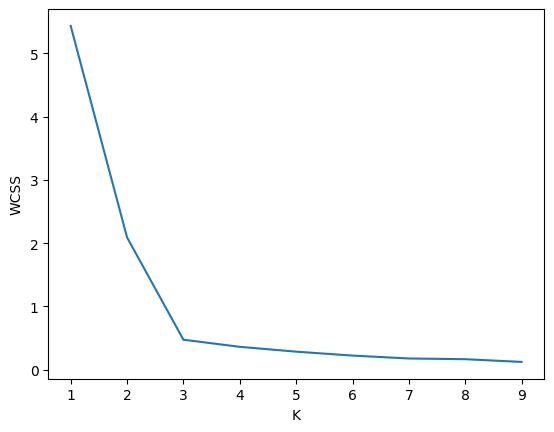

In [36]:
plt.plot(k_rng,wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt

As we can see the WCSS, K , we can see the elbow point suggests optimal K value is 3

# WCSS calculation

In [37]:
df1={
    'Point':["A", "B","C","D","E","F"],
    "X":[1,1,1,10,10,10],
    "Y":[2,4,0,2,4,0]
}

data = pd.DataFrame(df1)
data

,Point,X,Y
0,A,1,2
1,B,1,4
2,C,1,0
3,D,10,2
4,E,10,4
5,F,10,0


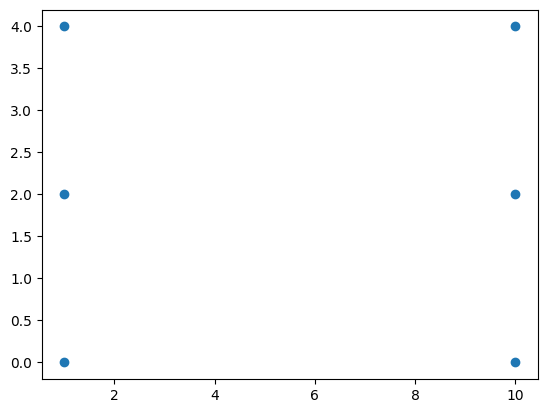

In [38]:
plt.scatter(data["X"],data["Y"])

WCSS = Summation over clusters Summation of data points in cluster Square of ecqlidean distance

Point A, B, C are in cluster 1 - Centroid (1+1+1/3 , 2+4+0/3) = (1,2) </br>
Point D, E, F are in cluster 2 - Centroid (10+10+10/3 , 2+4+0/3) = (10,2)
Ecquilidean distanec of A (1,2) from Centroid of cluster 1, (1,2) = Square root (( 1-1)^2 + (2-2)^2) = 0 <br/>
Ecquilidean distanec of B (1,4) from Centroid of cluster 1, (1,2) = Square root (( 1-1)^2 + (2-4)^2) = 2 <br/>
Ecquilidean distanec of C (1,0) from Centroid of cluster 1, (1,2) = Square root (( 1-1)^2 + (2-0)^2) = 2 <br/>

Ecquilidean distanec of D (10,2) from Centroid of cluster 1, (10,2) = Square root (( 1-1)^2 + (2-2)^2) = 0 <br/>
Ecquilidean distanec of B (10,4) from Centroid of cluster 1, (10,2) = Square root (( 1-1)^2 + (2-4)^2) = 2 <br/>
Ecquilidean distanec of C (10,0) from Centroid of cluster 1, (10,2) = Square root (( 1-1)^2 + (2-0)^2) = 2 <br/>

## WCSS = Summation over clusters Summation of data points in cluster Square of ecqlidean distance
## = 0^2+2^2+2^2 +0^2+ 2^2 + 2^2 = 4+4+4+4 = 16

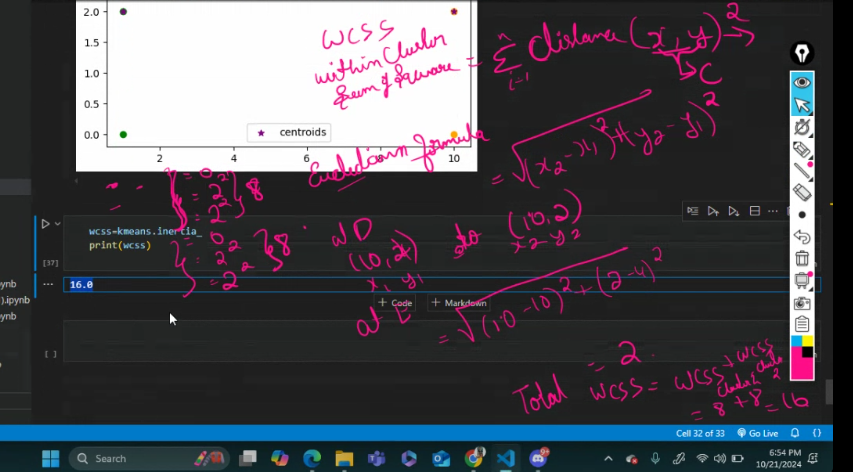

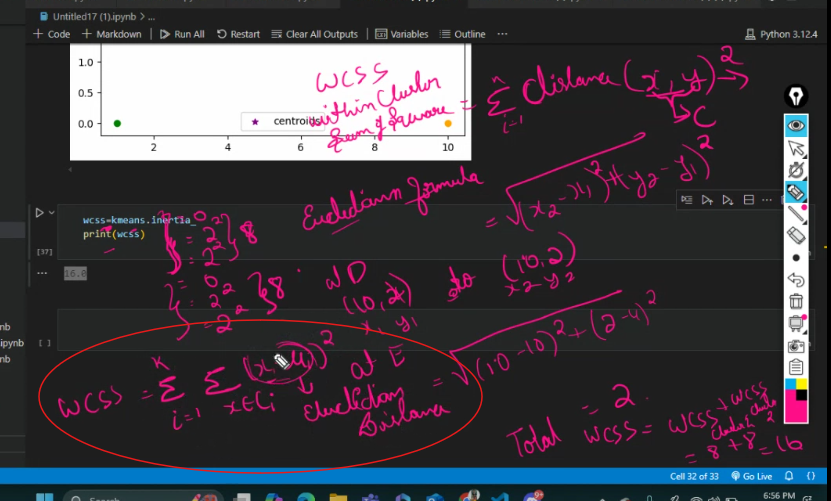